In [1]:
# Evaluate Accuracy, Recall, Precision scores for each 100 rows in our dataset

### Legal Advice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score

def compare_downvote_predictions(file_paths):
   all_results = []

   for file_path in file_paths:
       try:
           full_df = pd.read_csv(file_path)
           subreddit = file_path.split('/')[-1].split('_')[0]
           df = full_df.head(101).copy()

           def standardize_boolean(val):
               if pd.isna(val):
                   return 1
               val = str(val).upper()
               if val in ['TRUE', 'True', '1']:
                   return 1
               return 0

           df['Unfairly_Downvoted'] = df['Unfairly_Downvoted'].apply(standardize_boolean)
           df['LLM_unfairly_downvoted'] = df['LLM_unfairly_downvoted'].apply(standardize_boolean)
           full_df['LLM_unfairly_downvoted'] = full_df['LLM_unfairly_downvoted'].apply(standardize_boolean)

           y_true = df['Unfairly_Downvoted']
           y_pred = df['LLM_unfairly_downvoted']

           recall = recall_score(y_true, y_pred, zero_division=0)
           accuracy = accuracy_score(y_true, y_pred)
           roc_auc = roc_auc_score(y_true, y_pred)
           total_unfair_downvotes = (full_df['LLM_unfairly_downvoted'] == 1).mean() * 100

           all_results.append({
               'Subreddit': subreddit,
               'Recall': recall,
               'Accuracy': accuracy,
               'ROC_AUC': roc_auc,
               'Unfair_Downvote_Percentage': total_unfair_downvotes
           })

       except Exception as e:
           print(f"Error processing {file_path}: {str(e)}")

   results_df = pd.DataFrame(all_results)
   results_df = results_df.sort_values('Recall', ascending=False)

   print("\nResults for all subreddits:")
   print("-" * 95)
   print(f"{'Subreddit':<20} {'Recall':>10} {'Accuracy':>10} {'ROC_AUC':>10} {'Unfair_Downvotes %':>20}")
   print("-" * 95)

   for _, row in results_df.iterrows():
       print(f"{row['Subreddit']:<20} {row['Recall']:>10.3f} {row['Accuracy']:>10.3f} {row['ROC_AUC']:>10.3f} {row['Unfair_Downvote_Percentage']:>19.1f}%")

   return results_df

paths = [
   '/content/worldnews_comments_with_analysis.csv',
   '/content/legaladvice_comments_with_analysis.csv',
   '/content/askscience_comments_with_analysis.csv',
   '/content/NBA_comments_with_analysis.csv',
   '/content/IAmA_comments_with_analysis.csv',
   '/content/ScienceUncensored_comments_with_analysis.csv',
   '/content/technology_comments_with_analysis.csv',
   '/content/sports_comments_with_analysis.csv',
   '/content/politics_comments_with_analysis.csv',
   '/content/UCSD_comments_with_analysis.csv',
   '/content/MarkMyWords_comments_with_analysis.csv',
   '/content/AskHistorians_comments_with_analysis.csv',
   '/content/AskTrumpSupporters_comments_with_analysis.csv'
]

results = compare_downvote_predictions(paths)


Results for all subreddits:
-----------------------------------------------------------------------------------------------
Subreddit                Recall   Accuracy    ROC_AUC   Unfair_Downvotes %
-----------------------------------------------------------------------------------------------
AskHistorians             0.976      0.832      0.571                88.8%
technology                0.929      0.802      0.722                83.2%
MarkMyWords               0.914      0.713      0.586                72.4%
AskTrumpSupporters        0.878      0.743      0.518                79.9%
IAmA                      0.877      0.822      0.778                62.0%
ScienceUncensored         0.874      0.822      0.687                78.0%
worldnews                 0.827      0.822      0.747                74.4%
politics                  0.812      0.743      0.593                73.0%
UCSD                      0.811      0.792      0.724                82.0%
sports                    0.7

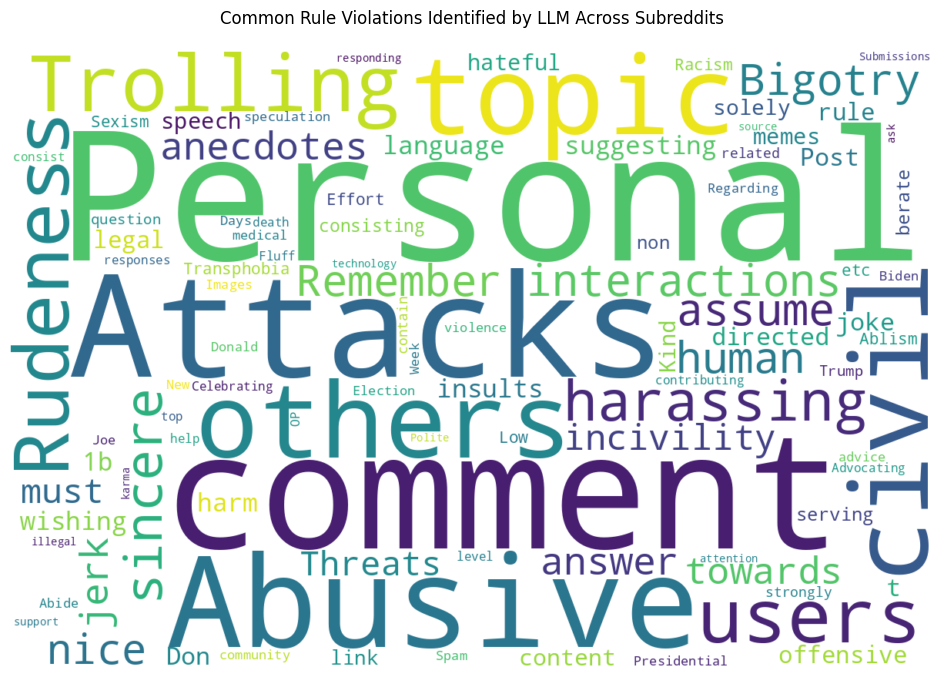


Rule Violation Frequencies:
No Rudeness, Personal Attacks or Trolling                                                                    294
Abusive or harassing comments                                                                                279
No incivility or personal attacks towards users                                                              180
Be nice                                                                                                      170
Be civil and sincere in all interactions and assume the same of others.                                      163
                                                                                                            ... 
Rule 4: Do not share or encourage the sharing of sexual, abusive, or suggestive content involving minors.      1
I bet OP won't answer this'-type responses or Non-contributing responses from users                            1
Threats, suggesting/wishing harm, or personal insults              

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def create_rule_violation_wordcloud():
    paths = [
        '/content/worldnews_comments_with_analysis.csv',
        '/content/legaladvice_comments_with_analysis.csv',
        '/content/askscience_comments_with_analysis.csv',
        '/content/NBA_comments_with_analysis.csv',
        '/content/IAmA_comments_with_analysis.csv',
        '/content/ScienceUncensored_comments_with_analysis.csv',
        '/content/technology_comments_with_analysis.csv',
        '/content/sports_comments_with_analysis.csv',
        '/content/politics_comments_with_analysis.csv',
        '/content/UCSD_comments_with_analysis.csv',
        '/content/MarkMyWords_comments_with_analysis.csv',
        '/content/AskHistorians_comments_with_analysis.csv',
        '/content/AskTrumpSupporters_comments_with_analysis.csv'
    ]

    all_rules = []
    for path in paths:
        try:
            df = pd.read_csv(path)
            rules = df['LLM_rule_violated'].dropna().astype(str).tolist()
            all_rules.extend(rules)
        except Exception as e:
            print(f"Error reading {path}: {e}")
            continue

    # Join all rules into a single string
    text = ' '.join(all_rules)

    wordcloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        max_words=100,
        collocations=False,
        min_font_size=10
    ).generate(text)

    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Common Rule Violations Identified by LLM Across Subreddits', pad=20)
    plt.show()

    rules_freq = pd.Series(all_rules).value_counts()
    print("\nRule Violation Frequencies:")
    print(rules_freq)

    print(f"\nTotal number of rule violations: {len(all_rules)}")

create_rule_violation_wordcloud()

In [3]:
import pandas as pd

def count_downvote_labels(file_paths):
   results = []

   for file_path in file_paths:
       try:
           df = pd.read_csv(file_path)
           df = df.head(100)  # Only take first 100 rows
           subreddit = file_path.split('/')[-1].split('_')[0]

           def standardize_boolean(val):
               if pd.isna(val):
                   return 1
               val = str(val).upper()
               if val in ['TRUE', 'True', '1']:
                   return 1
               return 0

           df['Unfairly_Downvoted'] = df['Unfairly_Downvoted'].apply(standardize_boolean)

           true_count = (df['Unfairly_Downvoted'] == 1).sum()
           false_count = (df['Unfairly_Downvoted'] == 0).sum()

           results.append({
               'Subreddit': subreddit,
               'True_Count': true_count,
               'False_Count': false_count
           })

       except Exception as e:
           print(f"Error processing {file_path}: {str(e)}")

   results_df = pd.DataFrame(results)

   print("\nCounts by Subreddit (First 100 rows):")
   print("-" * 60)
   print(f"{'Subreddit':<25} {'True Count':>15} {'False Count':>15}")
   print("-" * 60)

   for _, row in results_df.iterrows():
       print(f"{row['Subreddit']:<25} {row['True_Count']:>15} {row['False_Count']:>15}")

paths = [
   '/content/worldnews_comments_with_analysis.csv',
   '/content/legaladvice_comments_with_analysis.csv',
   '/content/askscience_comments_with_analysis.csv',
   '/content/NBA_comments_with_analysis.csv',
   '/content/IAmA_comments_with_analysis.csv',
   '/content/ScienceUncensored_comments_with_analysis.csv',
   '/content/technology_comments_with_analysis.csv',
   '/content/sports_comments_with_analysis.csv',
   '/content/politics_comments_with_analysis.csv',
   '/content/UCSD_comments_with_analysis.csv',
   '/content/MarkMyWords_comments_with_analysis.csv',
   '/content/AskHistorians_comments_with_analysis.csv',
   '/content/AskTrumpSupporters_comments_with_analysis.csv'
]

count_downvote_labels(paths)


Counts by Subreddit (First 100 rows):
------------------------------------------------------------
Subreddit                      True Count     False Count
------------------------------------------------------------
worldnews                              97               3
legaladvice                            83              17
askscience                             60              40
NBA                                    98               2
IAmA                                   72              28
ScienceUncensored                      86              14
technology                             69              31
sports                                 87              13
politics                               84              16
UCSD                                   89              11
MarkMyWords                            69              31
AskHistorians                          82              18
AskTrumpSupporters                     81              19
